In [1]:
%matplotlib inline

In [2]:
import glob
import os
import numpy as np
from natsort import natsorted
import Augmentor
from PIL import Image
import random
import pylab as plt
from uuid import uuid4
from tqdm.notebook import tqdm

In [ ]:
input_images = "data/imgs_o/*.tif"
input_masks = "data/masks_o/*.tif"

output_dir_imgs = 'data/imgs'
output_dir_masks = 'data/masks'

In [3]:
mask_images = natsorted(glob.glob(input_masks))
orig_images = natsorted(glob.glob(input_images))

In [4]:
for i in range(0, len(orig_images)):
    print(f"{i+1}: Orig:  {os.path.basename(orig_images[i])}| Mask: {os.path.basename(mask_images[i])}")

1: Orig:  Geckos1_001_raw_tiff0008.tif| Mask: Geckos1_001_raw_tiff0008.tif
2: Orig:  Geckos1_001_raw_tiff0014.tif| Mask: Geckos1_001_raw_tiff0014.tif
3: Orig:  Geckos1_001_raw_tiff0019.tif| Mask: Geckos1_001_raw_tiff0019.tif
4: Orig:  Geckos1_001_raw_tiff0021.tif| Mask: Geckos1_001_raw_tiff0021.tif
5: Orig:  Geckos1_001_raw_tiff0022.tif| Mask: Geckos1_001_raw_tiff0022.tif
6: Orig:  Geckos1_001_raw_tiff0024.tif| Mask: Geckos1_001_raw_tiff0024.tif
7: Orig:  Geckos1_001_raw_tiff0025.tif| Mask: Geckos1_001_raw_tiff0025.tif
8: Orig:  Geckos1_001_raw_tiff0029.tif| Mask: Geckos1_001_raw_tiff0029.tif
9: Orig:  Geckos1_001_raw_tiff0045.tif| Mask: Geckos1_001_raw_tiff0045.tif
10: Orig:  Geckos1_001_raw_tiff0047.tif| Mask: Geckos1_001_raw_tiff0047.tif
11: Orig:  Geckos1_001_raw_tiff0049.tif| Mask: Geckos1_001_raw_tiff0049.tif
12: Orig:  Geckos1_001_raw_tiff0050.tif| Mask: Geckos1_001_raw_tiff0050.tif
13: Orig:  Geckos1_001_raw_tiff0055.tif| Mask: Geckos1_001_raw_tiff0055.tif
14: Orig:  Geckos1_00

In [5]:
collated_images_and_masks = list(zip(orig_images, 
                                     mask_images))

In [6]:
images = [[np.asarray(Image.open(y)) for y in x] for x in collated_images_and_masks]

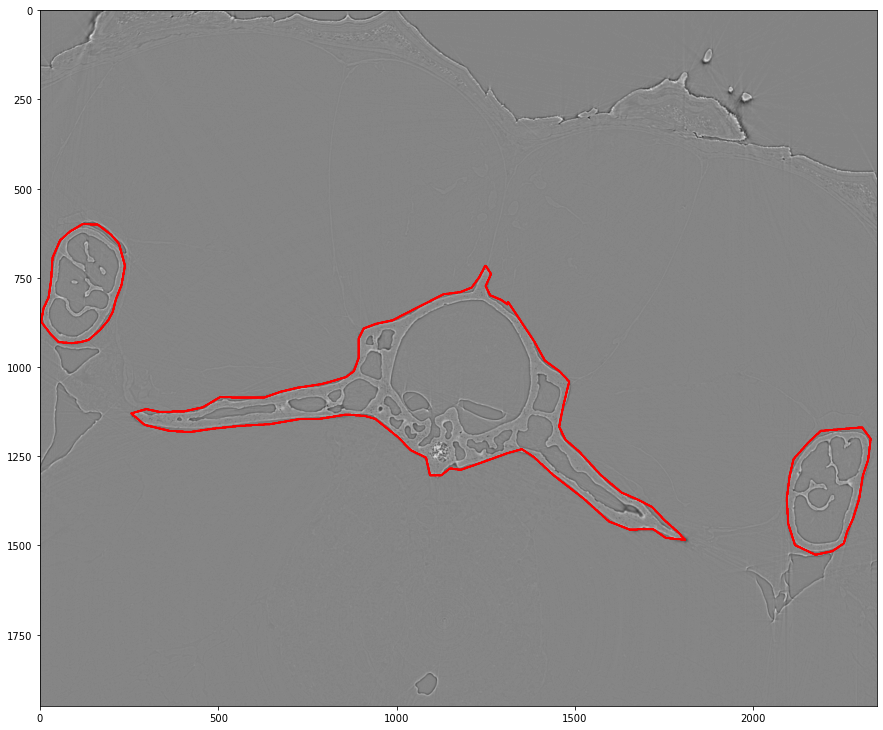

In [7]:
r_index = random.randint(0, len(images)-1)
plt.figure(figsize=(15,15))
plt.imshow(images[r_index][0], cmap="gray")
plt.contour(images[r_index][1], colors=['r'])
plt.show()

shape = images[r_index][0].shape

In [9]:
p = Augmentor.DataPipeline(images)
p.rotate(probability=0.2, max_left_rotation=25, max_right_rotation=25)
p.flip_left_right(probability=0.2)
# p.zoom_random(probability=0.2, percentage_area=0.8)
# p.crop_random(probability=0.2, percentage_area=0.8)
# p.histogram_equalisation(probability=0.5)
p.random_contrast(probability=0.1, min_factor=0.8, max_factor=1.2)
p.flip_top_bottom(probability=0.2)

In [10]:
os.makedirs(output_dir_imgs, exist_ok=True)
os.makedirs(output_dir_masks, exist_ok=True)
    
for i in tqdm(range(50)): #to not keep lot of images in memory
    augmented_images = p.sample(20)
    for ai in augmented_images:
        name = str(uuid4())
        Image.fromarray(ai[0]).save(os.path.join(output_dir_imgs, name+'.tiff'))
        Image.fromarray(ai[1]).save(os.path.join(output_dir_masks, name+'.png'))

  0%|          | 0/50 [00:00<?, ?it/s]

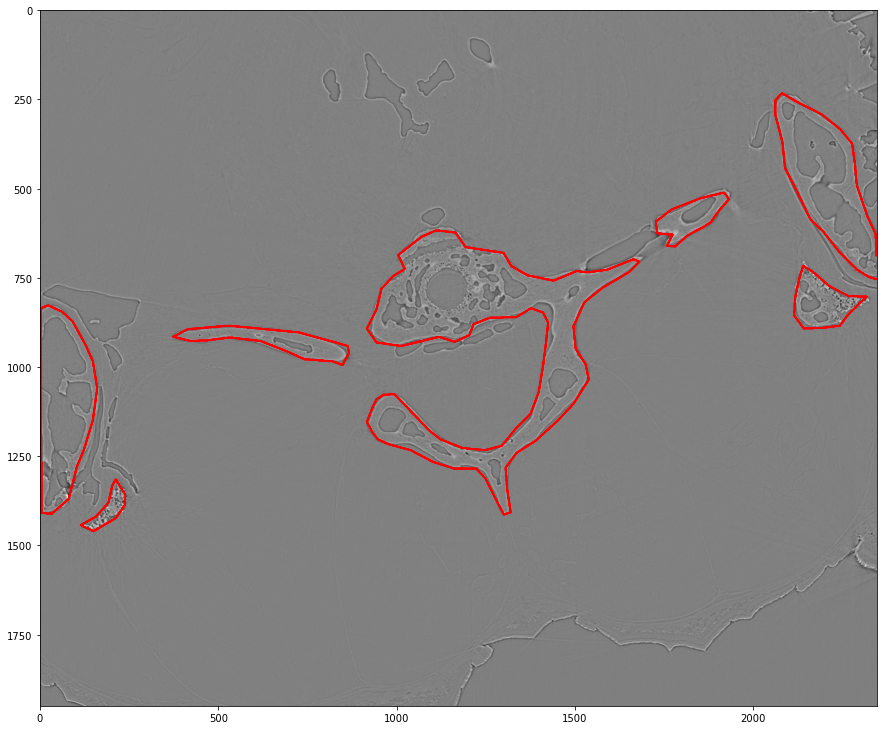

In [12]:
r_index = random.randint(0, len(augmented_images)-1)
plt.figure(figsize=(15,15))
plt.imshow(augmented_images[r_index][0], cmap="gray")
plt.contour(augmented_images[r_index][1], colors=['r'])
plt.show()